In [ ]:
pip install transformers torch seaborn matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 35.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [10]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertModel

# Load pretrained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased", output_attentions=True)

# Function to generate attention heatmap
def plot_attention_heatmap(text):
    # Tokenize input text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)

    # Forward pass through the model
    with torch.no_grad():
        outputs = model(**inputs)

    # Extract attention scores from the last layer and average across all heads
    attention = outputs.attentions[-1].squeeze(0).mean(dim=0).cpu().numpy()

    # Get tokenized words
    tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"].squeeze().tolist())

    # Plot heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(attention, xticklabels=tokens, yticklabels=tokens, cmap="coolwarm", annot=True)
    plt.title(f"Attention Heatmap for: {text}")
    plt.show()


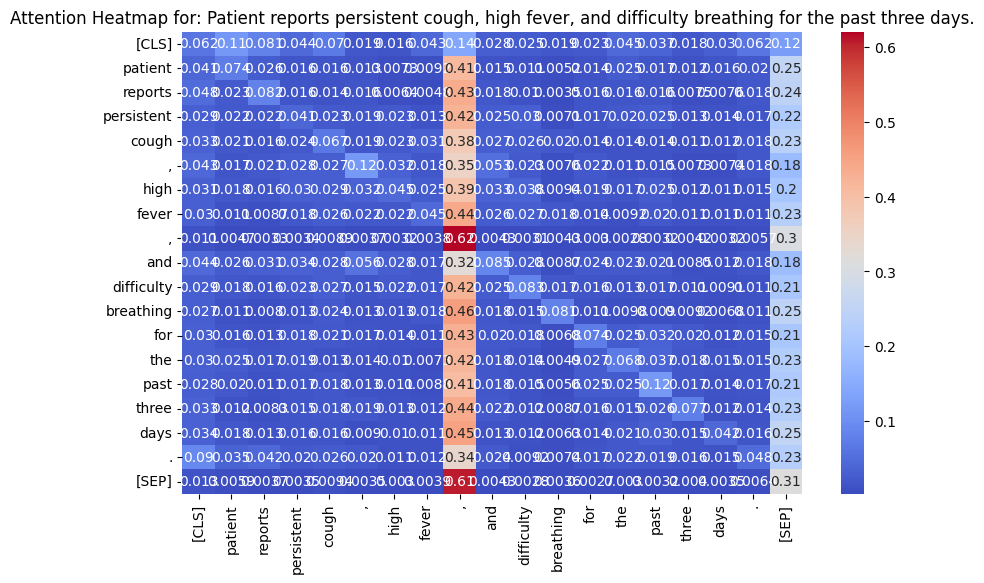

In [11]:
plot_attention_heatmap("Patient reports persistent cough, high fever, and difficulty breathing for the past three days.")


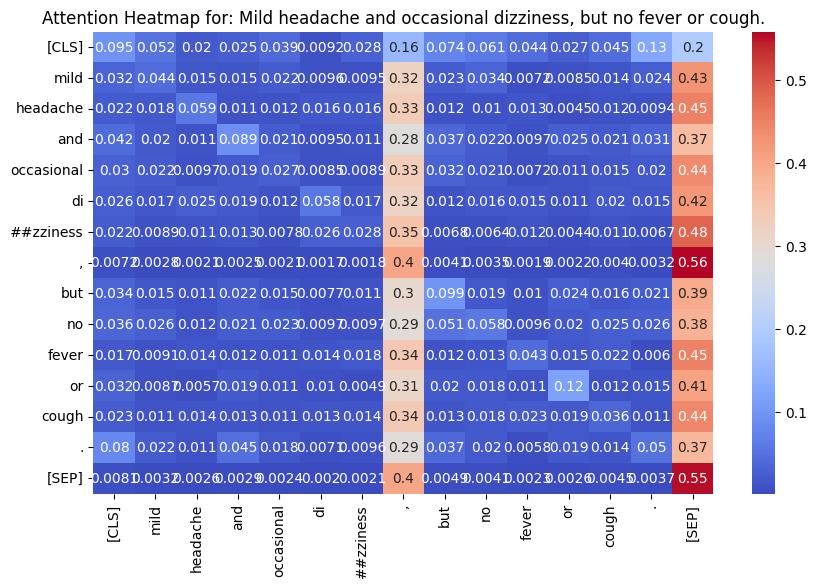

In [12]:
plot_attention_heatmap("Mild headache and occasional dizziness, but no fever or cough.")


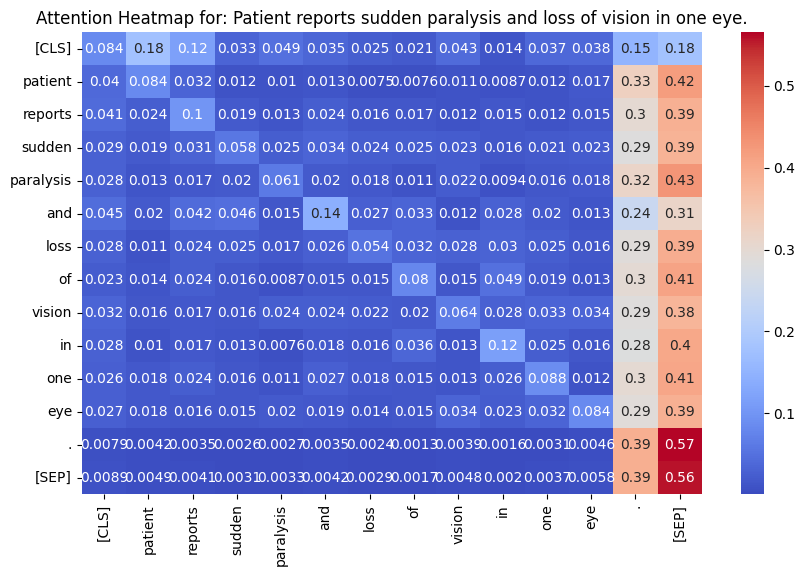

In [13]:
plot_attention_heatmap("Patient reports sudden paralysis and loss of vision in one eye.")
